In [94]:
from gurobipy import *
import networkx as nx
import matplotlib.pyplot as plt
from workflow import *
from pilp import *
from greedy import *
import lbbd
import lbbd_
import hybrid
import heft

# num_nodes, num_cores, dag =20, 5, 12
# num_nodes, num_cores, dag = 20, 5, 14
num_nodes, num_cores, num = 50, 8, 1


result_list = []
time_list = []
iter_list = []
for i in range(num, num+10):
    workflow_path = "./SyntheticSettings/DAGs/%d nodes/%d Cores/dag%d_%dn_%dc.gexf"%\
                    (num_nodes, num_cores, i, num_nodes, num_cores)
    system_path = "./SyntheticSettings/Systems/%dCoreSys.gexf" % 5

    dag = load_dag(workflow_path)
    # nx.draw(dag, with_labels=True)
    # plt.show()
    platform = nx.read_gexf(system_path)
    for u, v in platform.edges():
        platform[u][v]['bandwidth'] = int(random.randint(50, 100))

    for nd in dag.nodes():
        for rbt in ['Core%d'%(i) for i in range(6, num_cores)]:
            del dag.node[nd][rbt]
        for rbt in ['Core%d'%(i) for i in range(1, 6)]:
            dag.node[nd][rbt] = int(random.gauss(200, 50))
        dag.node[nd]['Core6']  = sum(dag.node[nd][rbt] for rbt in ['Core%d'%(i) for i in range(1, 6)] ) // 5 //5  
    for u, v in dag.edges():
        dag[u][v]['data'] = int(random.randint(50, 1000))
    des_path = './SyntheticSettings/default_dags/%d_nodes/dag_%d.gexf'%(num_nodes, i)
    nx.write_gexf(dag, des_path)
workflow_path

'./SyntheticSettings/DAGs/50 nodes/8 Cores/dag10_50n_8c.gexf'

In [189]:
makespan =  [1145, 1195, 1238, 1277, 1163, 1153, 1193, 1111, 1238, 1122]
time_cost =  [3626.7323772907257, 3625.6984276771545, 3653.6482548713684, 3619.126430749893, 3609.882581472397, 3652.2962608337402, 3658.443059206009, 3615.0458369255066, 3641.965057849884, 3652.522327184677]
gap =  [0.12227, 0.14276, 0.166, 0.20535, 0.13328, 0.15785, 0.23818, 0.21512, 0.22294, 0.20232]
import pandas as pd
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/hybrid_50nodes.csv', index=False, header=False)

In [93]:
makespan = [723, 753, 695, 672, 723, 739, 738, 693, 740, 689]
time_cost = [600, 600, 600, 600, 600, 600, 600, 600, 600, 600]
gap = [0.472, 0.435, 0.368, 0.413, 0.452, 0.435, 0.428, 0.413, 0.345, 0.467]

import pandas as pd
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/ilp_30nodes.csv', index=False, header=False)

In [85]:
makespan=[753, 695, 672, 723, 739, 738, 693, 740, 689]
sum(makespan)/len(makespan)

715.7777777777778

In [40]:
system_path = "./SyntheticSettings/Systems/%dCoreSys.gexf" % 6
platform = nx.read_gexf(system_path)
for u, v in platform.edges():
    if u == 'Core6' or v == 'Core6':
            platform[u][v]['bandwidth'] = 20
    else:
        platform[u][v]['bandwidth'] = int(random.randint(80, 160))
des_path = './SyntheticSettings/default_dags/platform.gexf'
nx.write_gexf(platform, des_path)

In [83]:
makespan = [573, 520, 589, 516, 488, 479, 452, 442, 485, 479]
time_cost =  [2, 1, 2, 4, 7, 132, 34, 106, 129, 600]
gap = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04]

import pandas as pd
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/ilp_20nodes.csv', index=False, header=False)

In [97]:
makespan =  [1255, 1195, 1238, 1277, 1214, 1166, 1193, 1210, 1255, 1137]
time_cost =  [20.240309953689575, 14.168118476867676, 36.798572301864624, 26.445485830307007, 15.273441314697266, 12.208611726760864, 3.5158793926239014, 5.1020190715789795, 47.06737184524536, 2.1290500164031982]
gap =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
import pandas as pd
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/heft_50nodes.csv', index=False, header=False)

In [100]:
makespan =  [719, 610, 794, 674, 691, 623, 611, 550, 632, 547]
time_cost =  [0.0007631778717041016, 0.0007433891296386719, 0.000850677490234375, 0.0007789134979248047, 0.0007882118225097656, 0.0014312267303466797, 0.0008759498596191406, 0.0017750263214111328, 0.0016715526580810547, 0.0018410682678222656]
gap =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
import pandas as pd
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/greedy_20nodes.csv', index=False, header=False)

In [117]:
makespan =  [1127, 1170, 1129, 1144, 1139, 1101, 1096, 1064, 1196, 1066]
time_cost =  [7.845785617828369, 3.198138475418091, 5.8433709144592285, 11.839221477508545, 3.9456260204315186, 4.726963758468628, 7.430063247680664, 8.798797369003296, 5.2278478145599365, 8.441510438919067]
gap =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/greedyant_50nodes.csv', index=False, header=False)

In [120]:
greedy = {num : pd.read_csv('./results/greedy_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30, 50]}

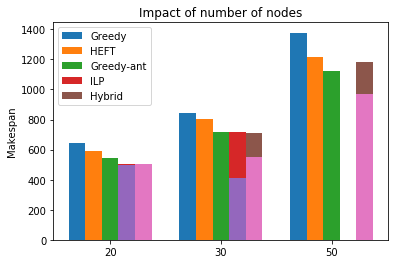

In [190]:
import numpy as np
import matplotlib.pyplot as plt

greedy = {num : pd.read_csv('./results/greedy_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30, 50]}
heft = {num : pd.read_csv('./results/heft_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30, 50]}
greedyant = {num : pd.read_csv('./results/greedyant_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30, 50]}
ilp = {num : pd.read_csv('./results/ilp_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30]}
hybrid = {num : pd.read_csv('./results/hybrid_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30, 50]}

N = 3
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.15       # the width of the bars: can also be len(x) sequence

p0 = plt.bar(ind-2*width, [np.mean(list(greedy[num][1])) for num in [20, 30, 50]], width)
p1 = plt.bar(ind-width, [np.mean(list(heft[num][1])) for num in [20, 30, 50]], width)
p2 = plt.bar(ind, [np.mean(list(greedyant[num][1])) for num in [20, 30, 50]], width)
p3 = plt.bar(ind+1*width, [np.mean(list(ilp[num][1])) for num in [20, 30]] + [0], width)
p3_1 = plt.bar(ind+1*width, [np.mean(list(ilp[num][1] * (1-ilp[num][0]) )) for num in [20, 30]] + [0], width)
p4 = plt.bar(ind+2*width, [np.mean(list(hybrid[num][1])) for num in [20, 30, 50]], width)
p4_1 = plt.bar(ind+2*width, [np.mean(list(hybrid[num][1] * (1-hybrid[num][0]) )) for num in [20, 30, 50]], width)



plt.ylabel('Makespan')
plt.title('Impact of number of nodes')
plt.xticks(ind, ('20', '30', '50'))
# plt.ylim(1100, 1450)
# plt.yticks(np.arange(800, 1400))
plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0]), ('Greedy', 'HEFT', 'Greedy-ant', 'ILP', 'Hybrid'))

plt.show()

In [184]:
np.mean(heft[50][1])

1214.0

In [192]:
greedyant[50][1]

0    1127
1    1170
2    1129
3    1144
4    1139
5    1101
6    1096
7    1064
8    1196
9    1066
Name: 1, dtype: int64

In [196]:
np.mean(greedyant[50][1])

1123.2

In [159]:
[np.mean(list(hybrid[num][1] * (1-ilp[num][0]) )) for num in [20, 30]]

[501.08000000000004, 410.40299999999996]